# Bike Rides Data Visualization
## Chigozie Francis Obasi

## Investigation Overview


> The overall goal of the project was to investigate the factors that determines the duration of the bike ride. These factors also included both numerical and categorical data.

> I also looked at answering some questions about the data to help me better understand the data and the relationship that exists between variables

> To help in my analysis, I was also involved in feature engineering to extract more variables from the original columns. These new variables included distance, speed, start_weekday, end_weekday




## Dataset Overview

> The data consisted of duration_sec and data of approximately 183412 rows of recorded bike rides with 16 columns. The attributes included the start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude among others. 197 data points of start_station_id and start_station_name, 8265 data points of member_birth_year and member_gender were removed from the analysis as they were found not to be needed for my analysis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import radians, cos, sin, asin, sqrt
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Python 3 program to calculate Distance Between Two Points on Earth
# Copied from https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.

def distance_km(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)*1000
     

In [4]:
#getting distance in meters using points latitutude and longitude

bike_data['distance_meter']= bike_data.apply(lambda x: distance_km(x.start_station_latitude, x.end_station_latitude, x.start_station_longitude, x.end_station_longitude), axis=1)

In [5]:
#Converting datatype of start_time and end_time columns

bike_data['start_time'] = pd.to_datetime(bike_data['start_time'], format='%Y/%m/%d %H:%M:%S')

bike_data['end_time'] = pd.to_datetime(bike_data['end_time'], format='%Y/%m/%d %H:%M:%S')


#Getting just month

bike_data['start_month'] = bike_data['start_time'].dt.month

bike_data['end_month'] = bike_data['end_time'].dt.month



#Getting just day

bike_data['start_day'] = bike_data['start_time'].dt.day

bike_data['end_day'] = bike_data['end_time'].dt.day

bike_data['start_time'].dt.weekday

bike_data['end_time'].dt.weekday


### Getting the week day series

weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

start_weekday = [weekDays[num] for num in bike_data['start_time'].dt.weekday]

end_weekday = [weekDays[num] for num in bike_data['end_time'].dt.weekday]

### start weekday

bike_data['start_weekday'] = start_weekday

### end weekday


bike_data['end_weekday'] = end_weekday

bike_data['speed'] = bike_data['distance_meter'] / bike_data['duration_sec']

In [6]:
## Drop Missing rows
bike_data.dropna(axis = 0, how ='any', inplace = True)

### droping index

#bike_data.drop(['index'],axis=1, inplace = True)

bike_data['age'] = bike_data['start_time'].dt.year - bike_data['member_birth_year']

### Droping columns I don't need for the analysis

bike_data.drop([ 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude',], axis=1, inplace = True)

In [7]:
#Converting member_birth_year to category column


bike_data['member_birth_year'] = bike_data.member_birth_year.astype('category')
#Converting bike_id to category column

bike_data['bike_id'] = bike_data.bike_id.astype('category')

## Distribution of speed?

> Speed has a nearly normal distribution, with a lot of bike_data duration coming between bike speed of 2 and 4 meters per second.



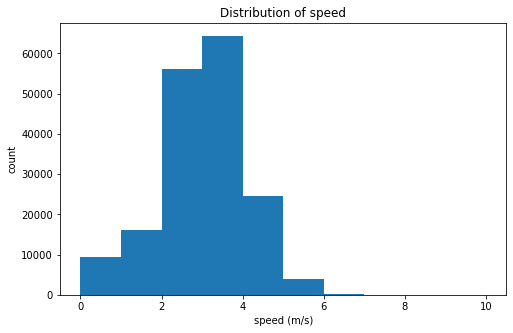

In [8]:
# start with a standard-scaled plot for speed
#binsize = 2
#bins = np.arange(0, bike_data['speed'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'speed')
plt.xlabel('speed (m/s)')
plt.ylabel('count')
plt.title('Distribution of speed')
plt.show()

## Distribution of distance

> Distance has a short-tailed distribution, with a lot of duration reached on short distance, and bike rides on the long
distance. When plotted on a log-scale, the distance distribution looks roughly normal distribution shaped. From the log plot it
can be seen that most of the distance data is roughly between 900 and 3000 meters with the peak value roughly at 1500 meters.

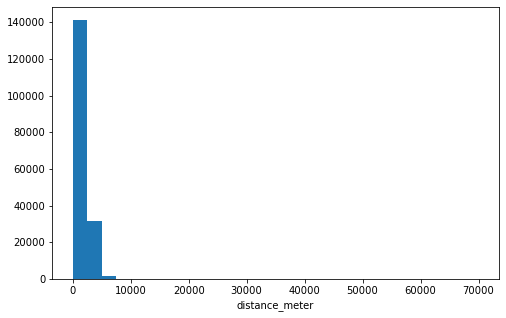

In [9]:
# plotting carat on a standard scale
binsize = 2500
bins = np.arange(0, bike_data['distance_meter'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'distance_meter', bins = bins)
#plt.xlim([0,50000])
plt.xlabel('distance_meter')
plt.show()

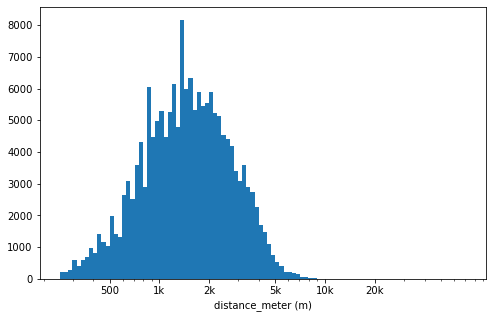

In [10]:
# there's a short tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins2 = 10 ** np.arange(2.4, np.log10(bike_data['distance_meter'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_data, x = 'distance_meter', bins = bins2)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('distance_meter (m)')
plt.show()

## What other insights can be gotten from the data?

> **Which gender is most represented in the dataset?**

> **Are bike ride mostly shared or not?**

> **On what day of the week has the does a bike ride start often?**

> **On what day of the week does a bike ride end often?**


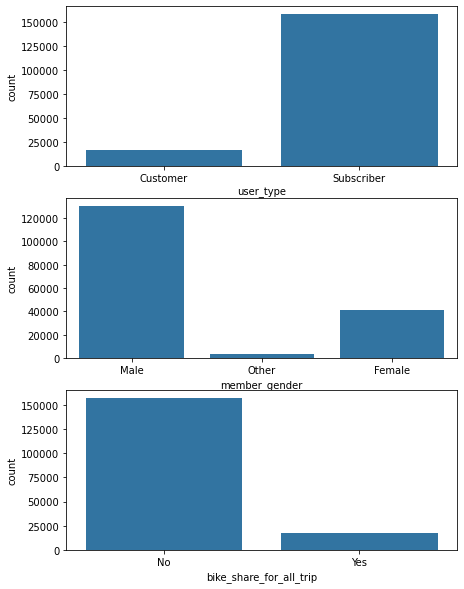

In [11]:

fig, ax = plt.subplots(nrows=3, figsize = [7,10])

order = bike_data['start_weekday'].value_counts().index
order2 = bike_data['end_weekday'].value_counts().index

default_color = sb.color_palette()[0]
sb.countplot(data = bike_data, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = bike_data, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = bike_data, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])
plt.show()

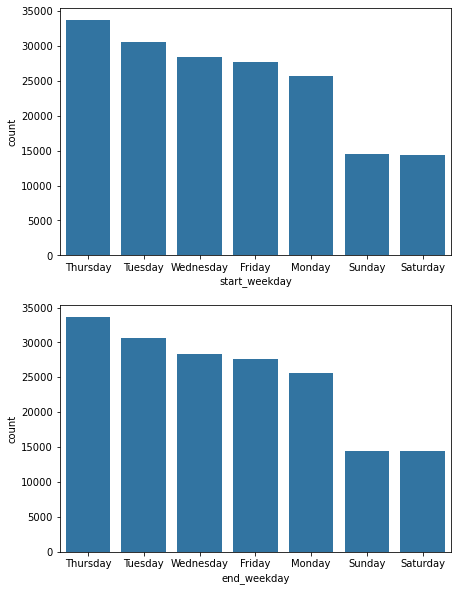

In [12]:
fig, ax = plt.subplots(nrows=2, figsize = [7,10])

sb.countplot(data = bike_data, x = 'start_weekday', color = default_color, ax = ax[0], order = order)
sb.countplot(data = bike_data, x = 'end_weekday', color = default_color, ax = ax[1], order = order2)

plt.show()

> There are more subscribers in the dataset than customers

> More males than females ride bikes according to the dataset

> Seems like a lot of riders do not share their bikes

> Most rides starts and ends on thursday 

## Speed vs Distance

> Speed is positively correlated with distance_meter which suggest that as the distance increases, riders increased their speed. Perhapd to gain grounds and complete the ride. However, this correlation is slightly weak. 


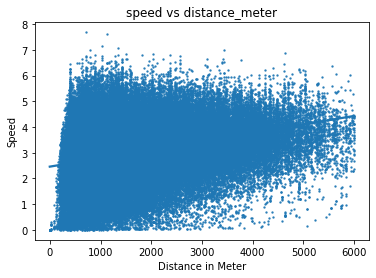

In [13]:
#Removing distance outliers


sb.regplot(x='distance_meter', y='speed', data=bike_data[bike_data['distance_meter']<6000],
             scatter_kws={'s':2});
plt.xlabel('Distance in Meter')
plt.ylabel('Speed')
plt.title('speed vs distance_meter');

## Speed vs Duration

> Plotting the scatterplot betwee speed and log duration shows that as the speed increases the duration reduces for most of the rides. This implies that as rides increases their speed, they tend to gain more distances reducing the time it takes to get to their destination



In [14]:
# compute the logarithm of duration_sec to make multivariate plotting easier

def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)



In [15]:
bike_data['log_distance'] = bike_data['distance_meter'].apply(log_trans)

In [16]:
bike_data['log_duration_sec'] = bike_data['duration_sec'].apply(log_trans)

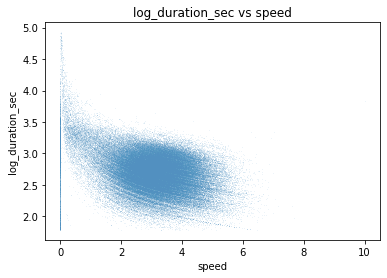

In [17]:

sb.scatterplot(x="speed", y="log_duration_sec", data=bike_data, s=1, alpha=0.1);
plt.title('log_duration_sec vs speed');

## Duration vs Day of the week

> It appears that the duration of bike_rides on weekends is longer that that of weekdays with Tuesday bike rides coming low.

> It could be infer that riding bike is a means of transportation to work

In [18]:
# Convert the "start_weekday" and "end_weekday" column from a plain object type into an ordered categorical type
day_classes = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=day_classes)
bike_data['end_weekday'] = bike_data['end_weekday'].astype(vclasses);
bike_data['start_weekday'] = bike_data['start_weekday'].astype(vclasses);


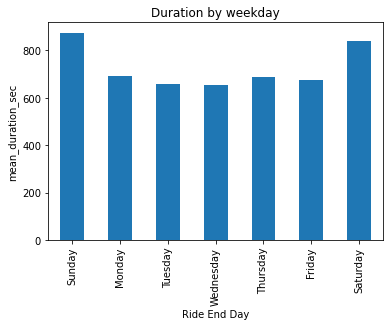

In [19]:


bike_data.groupby("end_weekday").duration_sec.mean().plot(kind="bar",title='Duration by weekday', ylabel='mean_duration_sec',
         xlabel='Ride End Day');

## Which day of the week had the highest distance travelled

> Tuesday had the longest trip by distance covered by bike_riders

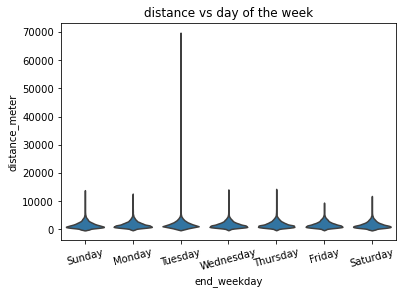

In [20]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=bike_data, x='end_weekday', y='distance_meter', color=base_color, inner=None)
plt.xticks(rotation=15);
plt.title('distance vs day of the week');

## How long it takes to cover distance by usertypes


it can be infered that as most customers tend to ride long distance and take longer time to complete those distances. Although some subcribers are able to cover more distance in less time, others also followed the trend of customers by taking longer time in covering more distance.



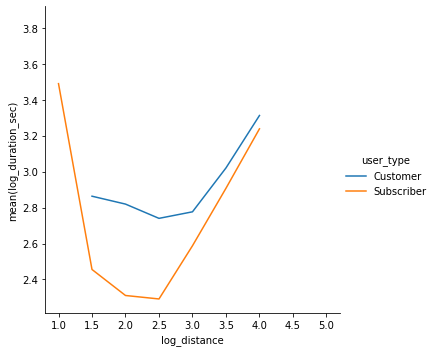

In [21]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, bike_data['log_distance'].max()+0.5, 0.5)
g = sb.FacetGrid(data = bike_data, hue = 'user_type', size = 5)
g.map(mean_poly, "log_distance", "log_duration_sec", bins = bin_edges)
g.set_ylabels('mean(log_duration_sec)')
g.add_legend();

## Does bike_sharing affects the distance covered by different user_type

> User types with high number of bike sharing tend not to covered more distance. It seems like non of the riders who are customers are willing to share their bikes

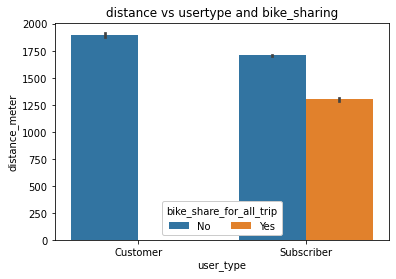

In [22]:
ax = sb.barplot(data = bike_data, x = 'user_type', y = 'distance_meter', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip');
plt.title('distance vs usertype and bike_sharing');

!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt